## Measuring efficiency of algorithms

shortest_path_times [4.172000044491142e-05, 6.207999540492892e-05, 8.109999762382359e-05, 0.00012802999845007434, 0.00018063999887090175, 0.00019585000118240714, 0.0002138099996955134, 0.00022446000220952556, 0.0002630400005728006]
dijkstra_path_times [0.0002775199958705343, 0.0008794399967882782, 0.001809119999234099, 0.0033809999993536623, 0.00567142999934731, 0.008086410000396426, 0.011237669999536593, 0.014354150003055111, 0.018193489995610435]


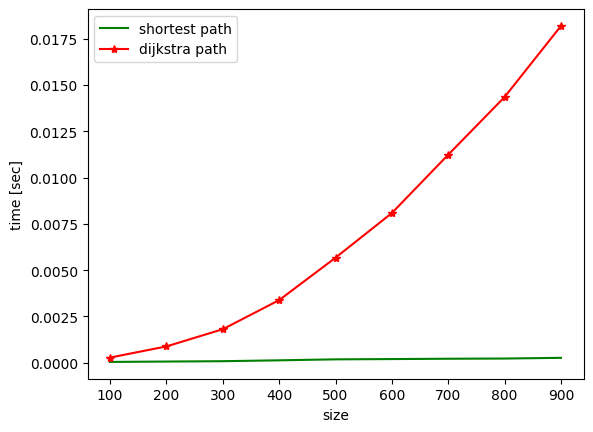

In [6]:
import numpy as np, networkx as nx, matplotlib.pyplot as plt

from time import process_time, process_time_ns, perf_counter, perf_counter_ns   # Exact measurement of CPU time
def measure_time(func, *args, **kwargs):
    """ return the run-time of the given function, in fractional seconds. """
    start = perf_counter()
    result = func(*args, **kwargs)
    end = perf_counter()
    return end-start

# pip install experiments_csv[plotting]
# import experiments_csv

def random_weighted_graph(num_of_nodes, probability_of_edge):
    G = nx.gnp_random_graph(num_of_nodes, probability_of_edge)  
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = np.random.randint(1,100)
    return G

probability_of_edge = 0.1
sizes = range(100, 1000, 100)
iterations = 10
shortest_path_times = []
dijkstra_path_times = []
for i,size in enumerate(sizes):
    shortest_path_times_for_size = []
    dijkstra_path_times_for_size = []
    for _ in range(iterations):
        G = random_weighted_graph(size, probability_of_edge)
        shortest_path_times_for_size.append(measure_time(nx.single_source_shortest_path_length, G, 0))
        dijkstra_path_times_for_size.append(measure_time(nx.single_source_dijkstra_path_length, G, 0))
    shortest_path_times.append(np.average(shortest_path_times_for_size))
    dijkstra_path_times.append(np.average(dijkstra_path_times_for_size))
print("shortest_path_times", shortest_path_times)
print("dijkstra_path_times", dijkstra_path_times)
plt.plot(sizes, shortest_path_times, 'g-', label="shortest path")
plt.plot(sizes, dijkstra_path_times, 'r-*', label="dijkstra path")
plt.xlabel("size")
plt.ylabel("time [sec]")
plt.legend();
